# Project: The Skin Cancer model Project

## Table of Contents

- <a href='#dataset'>1. Data Set Description</a>
- <a href="#wrangling">2. Data Wrangling</a>
    - <a href='#wranglingRetinal'>2.3.  Dataset Of Retinal OCT</a>
- <a href='#info'>4.1. Show Information Of DataSet</a>
- <a href="#eda">3. Exploratory Data Analysis</a>
- <a href='#pre'>4. Preprocessing DataSet</a>
    - <a href='#save'>4.2. Save DataSet After Preprocessing</a>
- <a href='#cnn'>5. CNN Model</a>
    - <a href='#aug'>5.1. Data Augmentation</a>
        - <a href='#apply'>5.1.1. Apply</a>
        - <a href='#demo'>5.1.2. Demo</a>
    - <a href='#build'>5.2. Model Building</a>
        - <a href='#scrath'>5.2.1. Model from Scratch </a>
             - <a href='#scrathf'>5.2.1.1. Model from Simple Scratch</a>
             - <a href='#scratchComplex'>5.2.1.2. Model from Scratch More Complex</a>
        - <a href='#VGG16'>5.2.2. Model VGG16</a>
            - <a href='#trainVGG16'>5.2.2.1. Model VGG16 ( trainable  )</a>
            - <a href='#freezeVGG16'>5.2.2.2. Model VGG16 ( false trainalbe ) </a>
        - <a href='#ResNet152V2'>5.2.3. Model ResNet152V2</a>
            - <a href='#trainResNet152V2'>5.2.3.1. Model ResNet152V2 ( trainable  )</a>
            - <a href='#freezeResNet152V2'>5.2.3.2. Model ResNet152V2 ( false trainalbe )</a>
        - <a href='#Xception'>5.2.4. Model Xception</a>
            - <a href='#aXception'>5.2.4.1. Model Xception  ( trainable  )</a>
            - <a href='#bXception'>5.2.4.2. Model Xception ( false trainalbe )</a>
        - <a href='#MobileNet'>5.2.5. Model MobileNet</a>
            - <a href='#trainMobileNet'>5.2.5.1. Model MobileNet  ( trainable  )</a>
            - <a href='#freezeMobileNet'>5.2.5.2. Model MobileNet ( false trainalbe )</a>
        - <a href='#InceptionV3'>5.2.6. Model InceptionV3</a>
            - <a href='#trainInceptionV3'>5.2.6.1. Model InceptionV3</a>
            - <a href='#freezeInceptionV3'>5.2.6.2. Model InceptionV3 ( false trainalbe )</a>
    - <a href='#perf'>5.3. Model Performance</a>
    - <a href='#tensor'>5.4. Convert Model Keras To TensorFlow</a>
- <a href='#concl'>. Conclusions</a>

<a id='dataset'></a>
## Data Set Description

The image data that was used for this problem is [skin-cancer-mnist-ham10000] (https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000.). 


# Importing libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D , Activation, Dropout, BatchNormalization, Flatten, Dense,AveragePooling2D
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.callbacks import ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn 
import random
import cv2
import os

<a id='wrangling'></a>
## Data Wrangling

### General Properties

<a id='wranglingRetinal'></a>
## Dataset Of Retinal OCT

In [2]:
list_paths = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       # print(os.path.join(dirname, filename))
        list_paths.append(os.path.join(dirname, filename))

In [3]:
list_paths = list_paths[5:]

In [4]:
list_name_image = []
for name in list_paths:
    name_image = name.split('/')[-1][:-4]
    list_name_image.append(name_image)

In [5]:
df = pd.read_csv('../input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
df.head()
list_class_categories = []
"""
name_disease = ''
basal cell carcinoma (bcc),
dermatofibroma (df),
melanoma (mel), 
melanocytic nevi (nv) ,
benign keratosis-like (bkl),
Actinic keratoses and intraepithelial carcinoma (akiec),
vascular lesions (vasc),
"""

#/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031685.jpg
for name_image in list_name_image:
    if df[df['image_id']  == name_image].iloc[0]['dx'] == 'nv':
        name_disease = 'Melanocytic_Nevi'
    elif df[df['image_id']  == name_image].iloc[0]['dx'] == 'bkl':
        name_disease = 'Benign_Keratosis_Like'
    elif df[df['image_id']  == name_image].iloc[0]['dx'] == 'akiec':
        name_disease= 'Actinic_keratoses'
    elif df[df['image_id']  == name_image].iloc[0]['dx'] == 'mel':
        name_disease = 'Melanoma'
    elif df[df['image_id']  == name_image].iloc[0]['dx'] == 'bcc':
        name_disease = 'Basal_Cell_Carcinoma'
    elif df[df['image_id']  == name_image].iloc[0]['dx'] == 'vasc':
        name_disease = 'Vascular_Lesions'
    elif df[df['image_id']  == name_image].iloc[0]['dx'] == 'df':
        name_disease = 'Dermatofibroma'
    list_class_categories.append(name_disease)

In [6]:
df_SkinCancer = pd.DataFrame({'filename': list_paths,'category' : list_class_categories })

In [7]:
df_SkinCancer[:5]

filename               category
0  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...       Melanocytic_Nevi
1  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...       Melanocytic_Nevi
2  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...       Melanocytic_Nevi
3  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...  Benign_Keratosis_Like
4  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...  Benign_Keratosis_Like

In [8]:
df_SkinCancer['category'].value_counts()

Melanocytic_Nevi         13410
Melanoma                  2226
Benign_Keratosis_Like     2198
Basal_Cell_Carcinoma      1028
Actinic_keratoses          654
Vascular_Lesions           284
Dermatofibroma             230
Name: category, dtype: int64

## Save DataSet

In [9]:
df_SkinCancer.to_csv('DataSet_SkinCancer.csv')

<a id='info'></a>
## Show Information Of DataSet

#### Gathering Data

In [10]:
df = pd.read_csv('DataSet_SkinCancer.csv')
df[:10]

Unnamed: 0                                           filename  \
0           0  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
1           1  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
2           2  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
3           3  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
4           4  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
5           5  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
6           6  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
7           7  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
8           8  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   
9           9  /kaggle/input/skin-cancer-mnist-ham10000/HAM10...   

                category  
0       Melanocytic_Nevi  
1       Melanocytic_Nevi  
2       Melanocytic_Nevi  
3  Benign_Keratosis_Like  
4  Benign_Keratosis_Like  
5      Actinic_keratoses  
6       Melanocytic_Nevi  
7       Melanocytic_Nevi  
8       Melanocytic_Nevi  
9       Melanocytic_Nevi

#### View information of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20030 non-null  int64 
 1   filename    20030 non-null  object
 2   category    20030 non-null  object
dtypes: int64(1), object(2)
memory usage: 469.6+ KB


#### View missing data

In [12]:
df.isnull().sum()

Unnamed: 0    0
filename      0
category      0
dtype: int64

#### View duplicated data

In [13]:
sum(df.duplicated())

0

#### View unique data

In [14]:
df['category'].unique()

array(['Melanocytic_Nevi', 'Benign_Keratosis_Like', 'Actinic_keratoses',
       'Melanoma', 'Basal_Cell_Carcinoma', 'Vascular_Lesions',
       'Dermatofibroma'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1 : Which Category has a number of recurrences more?

we will create a list of the type to find the recurrences for each category

In [15]:
list_type = df['category'].unique()  #list of category
dict_type = {}
for category in list_type:
    count = len(df[df['category'] == category])
    dict_type[category]= count

In [16]:
dict_type

{'Melanocytic_Nevi': 13410,
 'Benign_Keratosis_Like': 2198,
 'Actinic_keratoses': 654,
 'Melanoma': 2226,
 'Basal_Cell_Carcinoma': 1028,
 'Vascular_Lesions': 284,
 'Dermatofibroma': 230}

In [17]:
# to extract category by using high recurrences
high_category = max(dict_type.values())
type_cat = ''
for types , count in dict_type.items():
    if high_category == count:
        type_cat = types
        break
        
type_cat , high_category

('Melanocytic_Nevi', 13410)

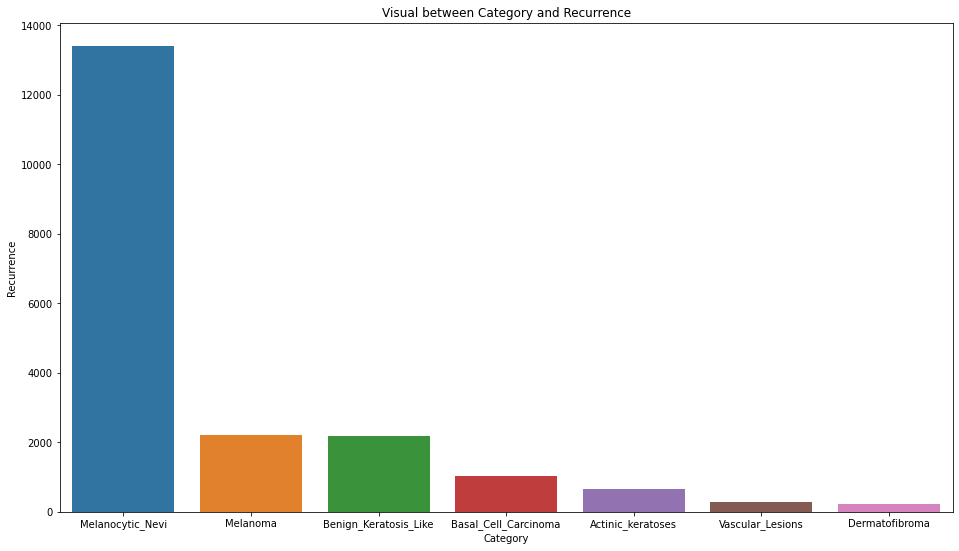

In [18]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
ax.set_title('Visual between Category and Recurrence')
plt.xlabel('Category')
plt.ylabel('Recurrence')
dict_type = dict(sorted(dict_type.items(), key=lambda item: item[1],reverse=True))
dict_seaborn ={}
for category , count in dict_type.items():
    dict_seaborn[category] =count
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.show()

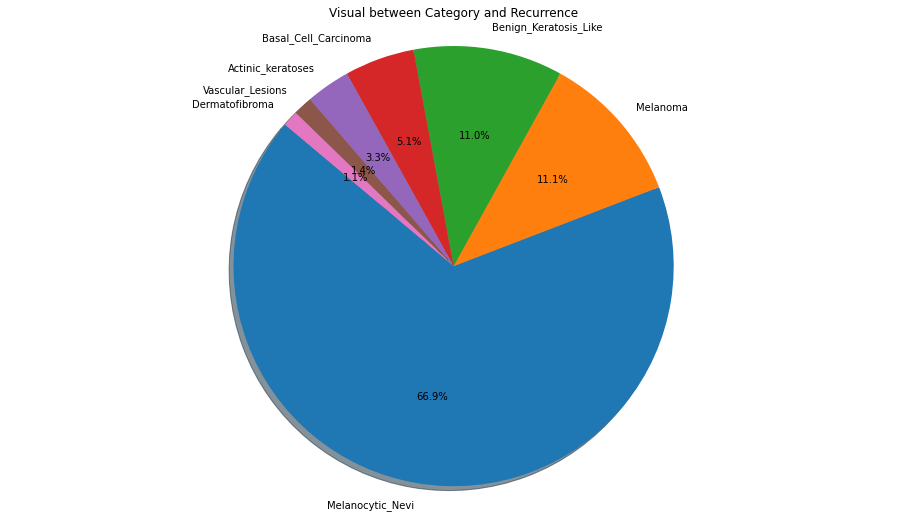

In [19]:
plt.subplots(figsize =(16, 9)) 
plt.title('Visual between Category and Recurrence')
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [20]:
print("Answer :It becomes clear to us that the category owner of the highest recurrence is "+list(dict_type.keys())[0]+" which amounts to his recurrence {} .".format(list(dict_type.values())[0]))

Answer :It becomes clear to us that the category owner of the highest recurrence is Melanocytic_Nevi which amounts to his recurrence 13410 .


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


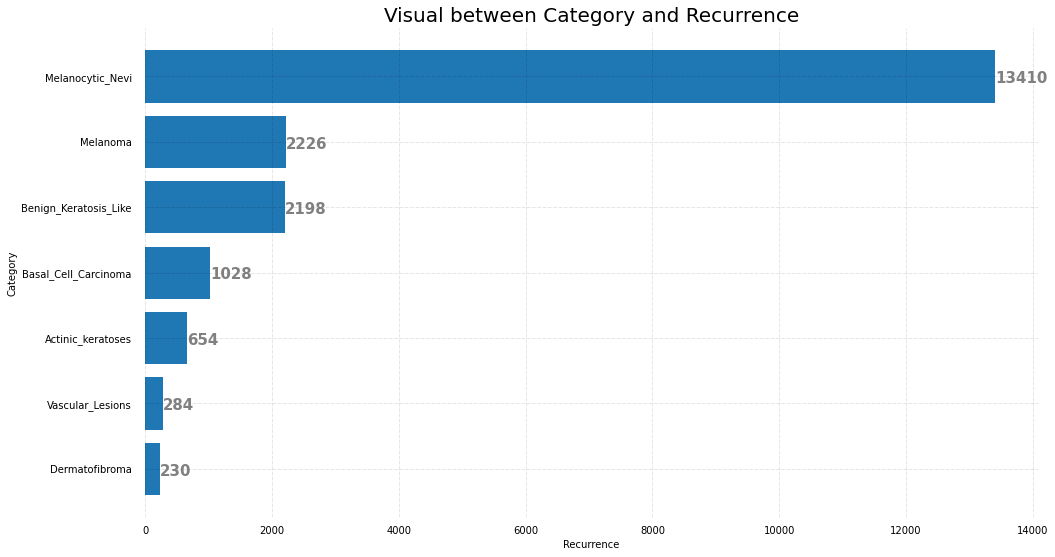

In [21]:
category = list(dict_seaborn.keys())
count = list(dict_seaborn.values())
  
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(category, count) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey') 
plt.xlabel('Recurrence')
plt.ylabel('Category')
ax.set_title('Visual between Category and Recurrence', fontsize=20)
# Show Plot 
plt.show(); 

<a id='pre'></a>
## Preprocessing DataSet

In [22]:
df_Melanocytic_Nevi = df[df['category'] == 'Melanocytic_Nevi']
df_Benign_Keratosis_Like = df[df['category'] == 'Benign_Keratosis_Like']
df_Actinic_keratoses = df[df['category'] == 'Actinic_keratoses']
df_Melanoma = df[df['category'] == 'Melanoma']
df_Basal_Cell_Carcinoma = df[df['category'] == 'Basal_Cell_Carcinoma']
df_Vascular_Lesions = df[df['category'] == 'Vascular_Lesions']
df_Dermatofibroma = df[df['category'] == 'Dermatofibroma']

In [23]:
len(df_Melanocytic_Nevi) , len(df_Benign_Keratosis_Like) , len(df_Actinic_keratoses) ,len(df_Melanoma) ,len(df_Basal_Cell_Carcinoma) , len(df_Vascular_Lesions) , len(df_Dermatofibroma) 

(13410, 2198, 654, 2226, 1028, 284, 230)

## We will split each of dataframe to three dataframe ( Train , Validate , Test)
#### Train 80%
#### Valid 20%
#### Test  10%

### We will split data of Melanocytic Nevi 

In [24]:
# data of Melanocytic Nevi
df_Melanocytic_Nevi_old = df_Melanocytic_Nevi
df_Melanocytic_Nevi = df_Melanocytic_Nevi.sample(frac=0.2).reset_index(drop=True)
validate_Melanocytic_Nevi= df_Melanocytic_Nevi.sample(frac = 0.2)
train_Melanocytic_Nevi = df_Melanocytic_Nevi.drop(validate_Melanocytic_Nevi.index)
validate_Melanocytic_Nevi= validate_Melanocytic_Nevi.reset_index()
train_Melanocytic_Nevi = train_Melanocytic_Nevi.reset_index()

test_Melanocytic_Nevi= train_Melanocytic_Nevi.sample(frac = 0.1)
train_Melanocytic_Nevi = train_Melanocytic_Nevi.drop(test_Melanocytic_Nevi.index)
test_Melanocytic_Nevi= test_Melanocytic_Nevi.reset_index()
train_Melanocytic_Nevi = train_Melanocytic_Nevi.reset_index()

In [25]:
len(df_Melanocytic_Nevi_old) , len(train_Melanocytic_Nevi) , len(validate_Melanocytic_Nevi) , len(test_Melanocytic_Nevi)

(13410, 1931, 536, 215)

### We will split data of Benign Keratosis Like 

In [26]:
# data of Benign Keratosis Like
df_Benign_Keratosis_Like_old = df_Benign_Keratosis_Like
validate_Benign_Keratosis_Like = df_Benign_Keratosis_Like.sample(frac = 0.2)
train_Benign_Keratosis_Like = df_Benign_Keratosis_Like.drop(validate_Benign_Keratosis_Like.index)
validate_Benign_Keratosis_Like= validate_Benign_Keratosis_Like.reset_index()
train_Benign_Keratosis_Like = train_Benign_Keratosis_Like.reset_index()
test_Benign_Keratosis_Like= train_Benign_Keratosis_Like.sample(frac = 0.1)
train_Benign_Keratosis_Like = train_Benign_Keratosis_Like.drop(test_Benign_Keratosis_Like.index)
test_Benign_Keratosis_Like= test_Benign_Keratosis_Like.reset_index()
train_Benign_Keratosis_Like = train_Benign_Keratosis_Like.reset_index()

In [27]:
len(df_Benign_Keratosis_Like_old) , len(train_Benign_Keratosis_Like) , len(validate_Benign_Keratosis_Like) ,len(test_Benign_Keratosis_Like)

(2198, 1582, 440, 176)

### We will split data of Actinic keratoses

In [28]:
# data of Actinic keratoses
df_Actinic_keratoses_old = df_Actinic_keratoses
validate_Actinic_keratoses= df_Actinic_keratoses.sample(frac = 0.2)
train_Actinic_keratoses = df_Actinic_keratoses.drop(validate_Actinic_keratoses.index)
validate_Actinic_keratoses= validate_Actinic_keratoses.reset_index()
train_Actinic_keratoses = train_Actinic_keratoses.reset_index()
test_Actinic_keratoses = train_Actinic_keratoses.sample(frac = 0.1)
train_Actinic_keratoses = train_Actinic_keratoses.drop(test_Actinic_keratoses.index)
test_Actinic_keratoses= test_Actinic_keratoses.reset_index()
train_Actinic_keratoses = train_Actinic_keratoses.reset_index()

In [29]:
len(df_Actinic_keratoses_old) , len(train_Actinic_keratoses) , len(validate_Actinic_keratoses) ,len(test_Actinic_keratoses)

(654, 471, 131, 52)

### We will split data of Melanoma

In [30]:
# data of Melanoma
df_Melanoma_old = df_Melanoma
validate_Melanoma = df_Melanoma.sample(frac = 0.2)
train_Melanoma= df_Melanoma.drop(validate_Melanoma.index)
validate_Melanoma= validate_Melanoma.reset_index()
train_Melanoma = train_Melanoma.reset_index()
test_Melanoma= train_Melanoma.sample(frac = 0.1)
train_Melanoma = train_Melanoma.drop(test_Melanoma.index)
test_Melanoma= test_Melanoma.reset_index()
train_Melanoma = train_Melanoma.reset_index()

In [31]:
len(df_Melanoma_old) , len(train_Melanoma) , len(validate_Melanoma) , len(test_Melanoma) 

(2226, 1603, 445, 178)

### We will split data of Basal Cell Carcinoma

In [32]:
# data of Basal Cell Carcinoma
df_Basal_Cell_Carcinoma_old = df_Basal_Cell_Carcinoma
validate_Basal_Cell_Carcinoma = df_Basal_Cell_Carcinoma.sample(frac = 0.2)
train_Basal_Cell_Carcinoma  = df_Basal_Cell_Carcinoma.drop(validate_Basal_Cell_Carcinoma.index)
validate_Basal_Cell_Carcinoma= validate_Basal_Cell_Carcinoma.reset_index()
train_Basal_Cell_Carcinoma = train_Basal_Cell_Carcinoma.reset_index()
test_Basal_Cell_Carcinoma  = train_Basal_Cell_Carcinoma.sample(frac = 0.1)
train_Basal_Cell_Carcinoma = train_Basal_Cell_Carcinoma.drop(test_Basal_Cell_Carcinoma.index)
test_Basal_Cell_Carcinoma= test_Basal_Cell_Carcinoma.reset_index()
train_Basal_Cell_Carcinoma = train_Basal_Cell_Carcinoma.reset_index()

In [33]:
len(df_Basal_Cell_Carcinoma_old) , len(train_Basal_Cell_Carcinoma) , len(validate_Basal_Cell_Carcinoma) , len(test_Basal_Cell_Carcinoma) 

(1028, 740, 206, 82)

### We will split data of Vascular Lesions

In [34]:
# data of Vascular Lesions
df_Vascular_Lesions_old = df_Vascular_Lesions
validate_Vascular_Lesions = df_Vascular_Lesions.sample(frac = 0.2)
train_Vascular_Lesions = df_Vascular_Lesions.drop(validate_Vascular_Lesions.index)
validate_Vascular_Lesions= validate_Vascular_Lesions.reset_index()
train_Vascular_Lesions = train_Vascular_Lesions.reset_index()
test_Vascular_Lesions= train_Vascular_Lesions.sample(frac = 0.1)
train_Vascular_Lesions = train_Vascular_Lesions.drop(test_Vascular_Lesions.index)
test_Vascular_Lesions= test_Vascular_Lesions.reset_index()
train_Vascular_Lesions = train_Vascular_Lesions.reset_index()

In [35]:
len(df_Vascular_Lesions_old) , len(train_Vascular_Lesions) , len(validate_Vascular_Lesions) , len(test_Vascular_Lesions) 

(284, 204, 57, 23)

### We will split data of Dermatofibroma

In [36]:
# data of Dermatofibroma
df_Dermatofibroma_old = df_Dermatofibroma
validate_Dermatofibroma = df_Dermatofibroma.sample(frac = 0.2)
train_Dermatofibroma = df_Dermatofibroma.drop(validate_Dermatofibroma.index)
validate_Dermatofibroma= validate_Dermatofibroma.reset_index()
train_Dermatofibroma = train_Dermatofibroma.reset_index()
test_Dermatofibroma = train_Dermatofibroma.sample(frac = 0.1)
train_Dermatofibroma = train_Dermatofibroma.drop(test_Dermatofibroma.index)
test_Dermatofibroma= test_Dermatofibroma.reset_index()
train_Dermatofibroma = train_Dermatofibroma.reset_index()

In [37]:
len(df_Dermatofibroma_old) , len(train_Dermatofibroma) , len(validate_Dermatofibroma) , len(test_Dermatofibroma) 

(230, 166, 46, 18)

<a id='save'></a>
##  Save DataSet After Preprocessing

In [38]:
!mkdir TRAIN    TRAIN/Melanocytic_Nevi TRAIN/Benign_Keratosis_Like   TRAIN/Actinic_keratoses   TRAIN/Melanoma   TRAIN/Basal_Cell_Carcinoma   TRAIN/Vascular_Lesions  TRAIN/Dermatofibroma 

!mkdir VAL    VAL/Melanocytic_Nevi VAL/Benign_Keratosis_Like   VAL/Actinic_keratoses   VAL/Melanoma   VAL/Basal_Cell_Carcinoma   VAL/Vascular_Lesions  VAL/Dermatofibroma

!mkdir TEST    TEST/Melanocytic_Nevi    TEST/Benign_Keratosis_Like   TEST/Actinic_keratoses   TEST/Melanoma   TEST/Basal_Cell_Carcinoma   TEST/Vascular_Lesions  TEST/Dermatofibroma  

In [39]:
IMG_SIZE = (300,300)
def process_save_img(size,full_path_img,name_image,new_folder):
    img = cv2.imread(full_path_img)
    img = cv2.resize(img,dsize=IMG_SIZE,interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(new_folder+'/'+name_image, img)

In [40]:
#DataSet Dermatofibroma
for filename in tqdm(train_Dermatofibroma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Dermatofibroma')
print('finish TRAIN/Dermatofibroma')
for filename in tqdm(validate_Dermatofibroma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Dermatofibroma')
print('finish VAL/Dermatofibroma')
for filename in tqdm(test_Dermatofibroma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Dermatofibroma')
print('finish TEST/Dermatofibroma')

#DataSet Melanocytic_Nevi
for filename in tqdm(train_Melanocytic_Nevi['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Melanocytic_Nevi')
print('finish TRAIN/Melanocytic_Nevi')
for filename in tqdm(validate_Melanocytic_Nevi['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Melanocytic_Nevi')
print('finish VAL/Melanocytic_Nevi')
for filename in tqdm(test_Melanocytic_Nevi['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Melanocytic_Nevi')
print('finish TEST/Melanocytic_Nevi')


#DataSet Benign_Keratosis_Like
for filename in tqdm(train_Benign_Keratosis_Like['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Benign_Keratosis_Like')
print('finish TRAIN/Benign_Keratosis_Like')
for filename in tqdm(validate_Benign_Keratosis_Like['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Benign_Keratosis_Like')
print('finish VAL/test_Benign_Keratosis_Like')
for filename in tqdm(test_Benign_Keratosis_Like['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Benign_Keratosis_Like')
print('finish TEST/Benign_Keratosis_Like')

#DataSet Melanoma
for filename in tqdm(train_Melanoma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Melanoma')
print('finish TRAIN/Melanoma')
for filename in tqdm(validate_Melanoma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Melanoma')
print('finish VAL/Melanoma')
for filename in tqdm(test_Melanoma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Melanoma')
print('finish TEST/Melanoma')


#DataSet Actinic_keratoses
for filename in tqdm(train_Actinic_keratoses['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Actinic_keratoses')
print('finish TRAIN/Actinic_keratoses')
for filename in tqdm(validate_Actinic_keratoses['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Actinic_keratoses')
print('finish VAL/Actinic_keratoses')
for filename in tqdm(test_Actinic_keratoses['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Actinic_keratoses')
print('finish TEST/Actinic_keratoses')


for filename in tqdm(train_Vascular_Lesions['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Vascular_Lesions')
print('finish TRAIN/Vascular_Lesions')
for filename in tqdm(validate_Vascular_Lesions['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Vascular_Lesions')
print('finish VAL/Vascular_Lesions')
for filename in tqdm(test_Vascular_Lesions['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Vascular_Lesions')
print('finish TEST/Vascular_Lesions')


#DataSet Basal_Cell_Carcinoma
for filename in tqdm(train_Basal_Cell_Carcinoma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Basal_Cell_Carcinoma')
print('finish TRAIN/Basal_Cell_Carcinoma')
for filename in tqdm(validate_Basal_Cell_Carcinoma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Basal_Cell_Carcinoma')
print('finish VAL/Basal_Cell_Carcinoma')
for filename in tqdm(test_Basal_Cell_Carcinoma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Basal_Cell_Carcinoma')
print('finish TEST/Basal_Cell_Carcinoma')

100%|██████████| 166/166 [00:03<00:00, 48.94it/s]


finish TRAIN/Dermatofibroma


100%|██████████| 46/46 [00:01<00:00, 40.67it/s]


finish VAL/Dermatofibroma


100%|██████████| 18/18 [00:00<00:00, 39.99it/s]


finish TEST/Dermatofibroma


100%|██████████| 1931/1931 [00:40<00:00, 47.70it/s]


finish TRAIN/Melanocytic_Nevi


100%|██████████| 536/536 [00:11<00:00, 46.84it/s]


finish VAL/Melanocytic_Nevi


100%|██████████| 215/215 [00:04<00:00, 47.12it/s]


finish TEST/Melanocytic_Nevi


100%|██████████| 1582/1582 [00:29<00:00, 53.85it/s]


finish TRAIN/Benign_Keratosis_Like


100%|██████████| 440/440 [00:08<00:00, 51.58it/s]


finish VAL/test_Benign_Keratosis_Like


100%|██████████| 176/176 [00:03<00:00, 56.36it/s]


finish TEST/Benign_Keratosis_Like


100%|██████████| 1603/1603 [00:30<00:00, 52.26it/s]


finish TRAIN/Melanoma


100%|██████████| 445/445 [00:07<00:00, 56.45it/s]


finish VAL/Melanoma


100%|██████████| 178/178 [00:03<00:00, 45.78it/s]


finish TEST/Melanoma


100%|██████████| 471/471 [00:08<00:00, 58.05it/s]


finish TRAIN/Actinic_keratoses


100%|██████████| 131/131 [00:02<00:00, 54.76it/s]


finish VAL/Actinic_keratoses


100%|██████████| 52/52 [00:00<00:00, 60.81it/s]


finish TEST/Actinic_keratoses


100%|██████████| 204/204 [00:03<00:00, 56.22it/s]


finish TRAIN/Vascular_Lesions


100%|██████████| 57/57 [00:00<00:00, 57.29it/s]


finish VAL/Vascular_Lesions


100%|██████████| 23/23 [00:00<00:00, 59.86it/s]


finish TEST/Vascular_Lesions


100%|██████████| 740/740 [00:15<00:00, 49.10it/s]


finish TRAIN/Basal_Cell_Carcinoma


100%|██████████| 206/206 [00:03<00:00, 55.99it/s]


finish VAL/Basal_Cell_Carcinoma


100%|██████████| 82/82 [00:01<00:00, 56.01it/s]

finish TEST/Basal_Cell_Carcinoma


In [41]:
print('Length Of Data { Melanocytic_Nevi } Train : ',len(os.listdir('TRAIN/Melanocytic_Nevi')))
print('Length Of Data { Melanocytic_Nevi } VAL : ',len(os.listdir('VAL/Melanocytic_Nevi')))
print('Length Of Data { Melanocytic_Nevi } TEST : ',len(os.listdir('TEST/Melanocytic_Nevi')))

print('Length Of Data { Benign_Keratosis_Like } Train : ',len(os.listdir('TRAIN/Benign_Keratosis_Like')))
print('Length Of Data { Benign_Keratosis_Like } VAL : ',len(os.listdir('VAL/Benign_Keratosis_Like')))
print('Length Of Data { Benign_Keratosis_Like } TEST : ',len(os.listdir('TEST/Benign_Keratosis_Like')))

print('Length Of Data { Actinic_keratoses } Train : ',len(os.listdir('TRAIN/Actinic_keratoses')))
print('Length Of Data { Actinic_keratoses } VAL : ',len(os.listdir('VAL/Actinic_keratoses')))
print('Length Of Data { Actinic_keratoses } TEST : ',len(os.listdir('TEST/Actinic_keratoses')))

print('Length Of Data { Melanoma } Train : ',len(os.listdir('TRAIN/Melanoma')))
print('Length Of Data { Melanoma } VAL : ',len(os.listdir('VAL/Melanoma')))
print('Length Of Data { Melanoma } TEST : ',len(os.listdir('TEST/Melanoma')))

print('Length Of Data { Basal_Cell_Carcinoma } Train : ',len(os.listdir('TRAIN/Basal_Cell_Carcinoma')))
print('Length Of Data { Basal_Cell_Carcinoma } VAL : ',len(os.listdir('VAL/Basal_Cell_Carcinoma')))
print('Length Of Data { Basal_Cell_Carcinoma } TEST : ',len(os.listdir('TEST/Basal_Cell_Carcinoma')))

print('Length Of Data { Vascular_Lesions } Train : ',len(os.listdir('TRAIN/Vascular_Lesions')))
print('Length Of Data { Vascular_Lesions } VAL : ',len(os.listdir('VAL/Vascular_Lesions')))
print('Length Of Data { Vascular_Lesions } TEST : ',len(os.listdir('TEST/Vascular_Lesions')))

print('Length Of Data { Dermatofibroma } Train : ',len(os.listdir('TRAIN/Dermatofibroma')))
print('Length Of Data { Dermatofibroma } VAL : ',len(os.listdir('VAL/Dermatofibroma')))
print('Length Of Data { Dermatofibroma } TEST : ',len(os.listdir('TEST/Dermatofibroma')))

Length Of Data { Melanocytic_Nevi } Train :  1804
Length Of Data { Melanocytic_Nevi } VAL :  527
Length Of Data { Melanocytic_Nevi } TEST :  211
Length Of Data { Benign_Keratosis_Like } Train :  1020
Length Of Data { Benign_Keratosis_Like } VAL :  395
Length Of Data { Benign_Keratosis_Like } TEST :  171
Length Of Data { Actinic_keratoses } Train :  309
Length Of Data { Actinic_keratoses } VAL :  118
Length Of Data { Actinic_keratoses } TEST :  52
Length Of Data { Melanoma } Train :  1025
Length Of Data { Melanoma } VAL :  394
Length Of Data { Melanoma } TEST :  174
Length Of Data { Basal_Cell_Carcinoma } Train :  475
Length Of Data { Basal_Cell_Carcinoma } VAL :  185
Length Of Data { Basal_Cell_Carcinoma } TEST :  77
Length Of Data { Vascular_Lesions } Train :  130
Length Of Data { Vascular_Lesions } VAL :  50
Length Of Data { Vascular_Lesions } TEST :  22
Length Of Data { Dermatofibroma } Train :  109
Length Of Data { Dermatofibroma } VAL :  43
Length Of Data { Dermatofibroma } TEST :

In [42]:
def plot_sample_new(path,labels_dict,start,end):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    plt.figure(figsize=(20,15))
    plt.suptitle('{}'.format(labels_dict))
    for img_name in tqdm(sorted(os.listdir(path))):   #tqdm --> progress bar 
        full_path_img = path + '/' + img_name
        img = cv2.imread(full_path_img, 0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(5,5,start)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        start += 1
        if start == end:
                break

<a id='cnn'></a>
## CNN Model

<a id='aug'></a>
## Data Augmentation

<a id='apply'></a>
## Apply

In [43]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=10,  
                                     zoom_range = 0.1, 
                                     width_shift_range=0.0,  height_shift_range=0.0) 

# Create Image Data Generator for Test/Validation Set
test_generator=ImageDataGenerator(rescale = 1./255)

In [44]:
IMG_SIZE = (224,224)
batch_size = 16
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'
train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 4872 images belonging to 7 classes.
Found 725 images belonging to 7 classes.
Found 1712 images belonging to 7 classes.


In [45]:
IMG_SIZE = (299,299)
batch_size = 64
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb99 = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb99 = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb99 = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 4872 images belonging to 7 classes.
Found 725 images belonging to 7 classes.
Found 1712 images belonging to 7 classes.


<a id='demo'></a>
## Demo

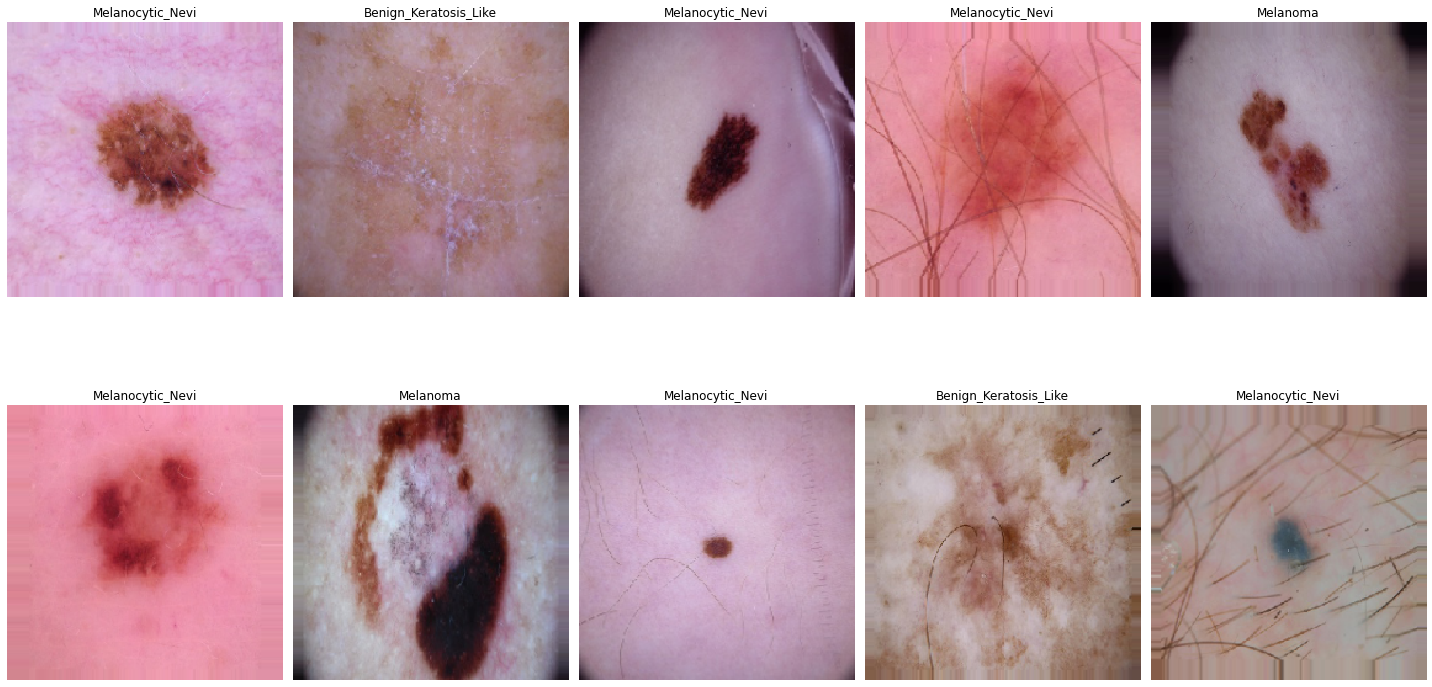

In [46]:
idx2label_dict = {trainRgb.class_indices[k]: k for k in trainRgb.class_indices}
idx2label_dict
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in trainRgb:
        image = X_batch[0]        
        plt.title(idx2label_dict.get(np.argmax(Y_batch[0])))    
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [47]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [48]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced',classes = np.unique(trainRgb.classes),y = trainRgb.classes)
cw = dict(zip( np.unique(trainRgb.classes), weights))
print(cw)

{0: 2.2524271844660193, 1: 1.4652631578947368, 2: 0.6823529411764706, 3: 6.385321100917431, 4: 0.3858093126385809, 5: 0.6790243902439025, 6: 5.3538461538461535}


<a id='build'></a>
## Model Building

<a id='scrath'></a>
## Model from Scratch

<a id='scrathf'></a>
## Model from Simple Scratch

In [49]:
input_shape = (224,224,3)
scratchSimple = Sequential()
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Flatten())
scratchSimple.add(Dense(activation = 'relu', units = 128))
scratchSimple.add(Dense(activation = 'relu', units = 64))
scratchSimple.add(Dense(activation = 'softmax', units = 7))
scratchSimple.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
scratchSimple.summary()

2022-06-06 00:54:13.508462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 00:54:13.607125: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 00:54:13.608029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

2022-06-06 00:54:13.609847: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-06 00:54:13.610166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 00:54:13.610945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 00:54:13.611611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

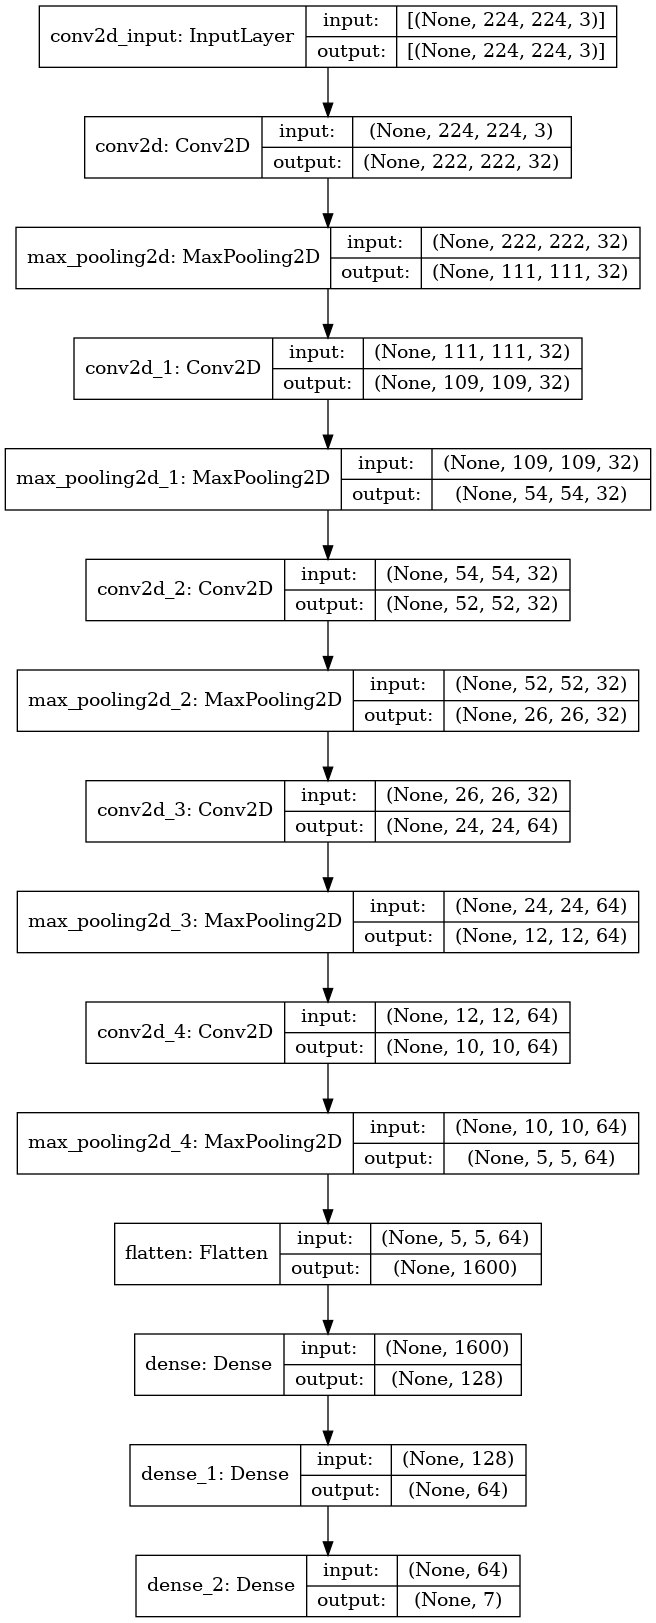

In [82]:
from tensorflow.keras.utils import plot_model
plot_model(scratchSimple,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [50]:
epochs = 60

historySimple = scratchSimple.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchSimple.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-06 00:54:16.446074: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-06-06 00:54:18.399707: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


304/304 [==============================] - 72s 214ms/step - loss: 1.9431 - accuracy: 0.1063 - val_loss: 1.9486 - val_accuracy: 0.2307
Epoch 2/60
304/304 [==============================] - 65s 213ms/step - loss: 1.9437 - accuracy: 0.1808 - val_loss: 1.9480 - val_accuracy: 0.2301
Epoch 3/60
304/304 [==============================] - 66s 217ms/step - loss: 1.9454 - accuracy: 0.0939 - val_loss: 1.9468 - val_accuracy: 0.0251
Epoch 4/60
304/304 [==============================] - 65s 215ms/step - loss: 1.9456 - accuracy: 0.0354 - val_loss: 1.9459 - val_accuracy: 0.0251
Epoch 5/60
304/304 [==============================] - 66s 217ms/step - loss: 1.9491 - accuracy: 0.0968 - val_loss: 1.9467 - val_accuracy: 0.1081
Epoch 6/60
304/304 [==============================] - 66s 217ms/step - loss: 1.9460 - accuracy: 0.1437 - val_loss: 1.9459 - val_accuracy: 0.2301

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/60
304/304 [==============================] - 65s 21

In [51]:
scratchSimple.save('./scratchSimpleS.h5')

<a id='scratchComplex'></a>
## Model from Scrath More Complex

In [52]:
input_shape = (224,224,3)
scratchComplex = Sequential()
scratchComplex.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Dropout(0.10))
scratchComplex.add(Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Dropout(0.10))
scratchComplex.add(Flatten())
scratchComplex.add(Dense(activation = 'relu', units = 128))
scratchComplex.add(Dense(activation = 'relu', units = 64))
scratchComplex.add(Dense(activation = 'softmax', units = 7))
scratchComplex.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
scratchComplex.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 64)       

In [53]:
epochs = 60

historyComplex = scratchComplex.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchComplex.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/60
304/304 [==============================] - 69s 223ms/step - loss: 2.5300 - accuracy: 0.2838 - val_loss: 2.4366 - val_accuracy: 0.2220
Epoch 2/60
304/304 [==============================] - 68s 223ms/step - loss: 1.7796 - accuracy: 0.3546 - val_loss: 4.3406 - val_accuracy: 0.0940
Epoch 3/60
304/304 [==============================] - 67s 219ms/step - loss: 1.6453 - accuracy: 0.3785 - val_loss: 2.0918 - val_accuracy: 0.3464
Epoch 4/60
304/304 [==============================] - 68s 224ms/step - loss: 1.5155 - accuracy: 0.4191 - val_loss: 2.3128 - val_accuracy: 0.2751
Epoch 5/60
304/304 [==============================] - 69s 228ms/step - loss: 1.4567 - accuracy: 0.4469 - val_loss: 1.6863 - val_accuracy: 0.3855
Epoch 6/60
304/304 [==============================] - 67s 221ms/step - loss: 1.4409 - accuracy: 0.4277 - val_loss: 1.7881 - val_accuracy: 0.3680
Epoch 7/60
304/304 [==============================] - 70s 230ms/step - loss: 1.3867 - accuracy: 0.4539 - val_loss: 1.9989 - val_ac

In [54]:
scratchComplex.save('./scratchComplexS.h5')

 <a id='VGG16'></a>
## Model VGG16

 <a id='trainVGG16'></a>
## Model VGG16 ( trainable  )

In [84]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16= Sequential()
model_VGG16.add(VGG16)
model_VGG16.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Flatten())
model_VGG16.add(Dense(128,activation='relu'))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Dense(7, activation='softmax'))
model_VGG16.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs = 30

historyVGG16 = model_VGG16.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
model_VGG16.save('./model_VGG16S.h5')

 <a id='freezeVGG16'></a>
## Model VGG16 ( false trainable )

In [55]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16F = Sequential()
for layer in VGG16.layers:
    layer.trainable = False
model_VGG16F.add(VGG16)
model_VGG16F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16F.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Flatten())
model_VGG16F.add(Dense(128,activation='relu'))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Dense(7 ,activation='softmax'))
model_VGG16F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16F.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_______________________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [56]:
epochs = 30

historyVGG16F = model_VGG16F.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16F.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30
304/304 [==============================] - 75s 239ms/step - loss: 1.8320 - accuracy: 0.2335 - val_loss: 1.6729 - val_accuracy: 0.3814
Epoch 2/30
304/304 [==============================] - 73s 239ms/step - loss: 1.6264 - accuracy: 0.3639 - val_loss: 1.5473 - val_accuracy: 0.4176
Epoch 3/30
304/304 [==============================] - 73s 239ms/step - loss: 1.5031 - accuracy: 0.4014 - val_loss: 1.6172 - val_accuracy: 0.3534
Epoch 4/30
304/304 [==============================] - 70s 231ms/step - loss: 1.4200 - accuracy: 0.4094 - val_loss: 1.5476 - val_accuracy: 0.3487

Epoch 00004: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 5/30
304/304 [==============================] - 69s 228ms/step - loss: 1.3488 - accuracy: 0.4425 - val_loss: 1.4688 - val_accuracy: 0.4258
Epoch 6/30
304/304 [==============================] - 71s 235ms/step - loss: 1.3291 - accuracy: 0.4487 - val_loss: 1.4032 - val_accuracy: 0.4352
Epoch 7/30
304/304 [============================

In [57]:
model_VGG16F.save('./model_VGG16FS.h5')

<a id='ResNet152V2'></a>
## Model ResNet152V2 

<a id='trainResNet152V2'></a>
## Model ResNet152V2 ( trainable  )

In [58]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
model_Resnet = Sequential()
model_Resnet.add(ResNet152V2)
model_Resnet.add(Flatten())
model_Resnet.add(Dense(512, activation='relu'))
model_Resnet.add(Dense(7, activation='softmax'))
model_Resnet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Resnet.summary()

234561536/234545216 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 3591      
Total params: 109,715,975
Trainable params: 109,572,231
Non-trainable params: 143,744
_________________________________________________________________


In [59]:
epochs = 30
historyResnet = model_Resnet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Resnet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/30
304/304 [==============================] - 121s 345ms/step - loss: 1.5279 - accuracy: 0.5068 - val_loss: 1.3459 - val_accuracy: 0.4515
Epoch 2/30
304/304 [==============================] - 101s 334ms/step - loss: 0.9289 - accuracy: 0.6192 - val_loss: 0.9038 - val_accuracy: 0.6571
Epoch 3/30
304/304 [==============================] - 102s 334ms/step - loss: 0.7926 - accuracy: 0.6717 - val_loss: 1.1295 - val_accuracy: 0.5789
Epoch 4/30
304/304 [==============================] - 103s 337ms/step - loss: 0.6734 - accuracy: 0.6936 - val_loss: 0.9382 - val_accuracy: 0.7231

Epoch 00004: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 5/30
304/304 [==============================] - 101s 332ms/step - loss: 0.4018 - accuracy: 0.7848 - val_loss: 0.4157 - val_accuracy: 0.8423
Epoch 6/30
304/304 [==============================] - 102s 334ms/step - loss: 0.2899 - accuracy: 0.8363 - val_loss: 0.3896 - val_accuracy: 0.8522
Epoch 7/30
304/304 [======================

In [60]:
model_Resnet.save('./model_ResnetS.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<a id='freezeResNet152V2'></a>
## Model ResNet152V2 ( false trainable  )

In [61]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in ResNet152V2.layers:
        layer.trainable=False
model_ResnetF = Sequential()
model_ResnetF.add(ResNet152V2)
model_ResnetF.add(Flatten())
model_ResnetF.add(Dense(512, activation='relu'))
model_ResnetF.add(Dense(7, activation='softmax'))
model_ResnetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_ResnetF.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 3591      
Total params: 109,715,975
Trainable params: 51,384,327
Non-trainable params: 58,331,648
_________________________________________________________________


In [62]:
epochs = 30
historyResnetF = model_ResnetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_ResnetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/30
304/304 [==============================] - 87s 263ms/step - loss: 1.8224 - accuracy: 0.4506 - val_loss: 1.1344 - val_accuracy: 0.5847
Epoch 2/30
304/304 [==============================] - 78s 255ms/step - loss: 1.0598 - accuracy: 0.5871 - val_loss: 0.9254 - val_accuracy: 0.6437
Epoch 3/30
304/304 [==============================] - 78s 256ms/step - loss: 0.8087 - accuracy: 0.6483 - val_loss: 0.9780 - val_accuracy: 0.6671
Epoch 4/30
304/304 [==============================] - 78s 257ms/step - loss: 0.7374 - accuracy: 0.6911 - val_loss: 0.8414 - val_accuracy: 0.6933
Epoch 5/30
304/304 [==============================] - 79s 260ms/step - loss: 0.5929 - accuracy: 0.7360 - val_loss: 0.7755 - val_accuracy: 0.7255
Epoch 6/30
304/304 [==============================] - 80s 264ms/step - loss: 0.4818 - accuracy: 0.7724 - val_loss: 0.6747 - val_accuracy: 0.7669
Epoch 7/30
304/304 [==============================] - 81s 265ms/step - loss: 0.3997 - accuracy: 0.8031 - val_loss: 0.6731 - val_ac

In [63]:
model_ResnetF.save('./model_ResnetFS.h5')

<a id='Xception'></a>
## Model Xception 

<a id='aXception'></a>
## Model Xception ( trainable  )           

In [64]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
model_Xception= Sequential()
model_Xception.add(Xception)
model_Xception.add(Conv2D(64, (3, 3), activation = 'relu'))
model_Xception.add(MaxPooling2D(pool_size = (2, 2)))
model_Xception.add(Dropout(0.10))
model_Xception.add(Flatten())
model_Xception.add(Dense(128,activation='relu'))
model_Xception.add(Dropout(0.10))
model_Xception.add(Dense(7, activation='softmax'))
model_Xception.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Xception.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_______________________________________________________

In [65]:
epochs = 30
historyXception = model_Xception.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)
test_accu = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30
304/304 [==============================] - 103s 319ms/step - loss: 1.4979 - accuracy: 0.4283 - val_loss: 1.0053 - val_accuracy: 0.6063
Epoch 2/30
304/304 [==============================] - 96s 315ms/step - loss: 0.8516 - accuracy: 0.6306 - val_loss: 0.6805 - val_accuracy: 0.7436
Epoch 3/30
304/304 [==============================] - 95s 312ms/step - loss: 0.6692 - accuracy: 0.6936 - val_loss: 0.5499 - val_accuracy: 0.7897
Epoch 4/30
304/304 [==============================] - 95s 311ms/step - loss: 0.4971 - accuracy: 0.7621 - val_loss: 0.5186 - val_accuracy: 0.7967
Epoch 5/30
304/304 [==============================] - 95s 311ms/step - loss: 0.4312 - accuracy: 0.7825 - val_loss: 0.4888 - val_accuracy: 0.8201
Epoch 6/30
304/304 [==============================] - 95s 312ms/step - loss: 0.3670 - accuracy: 0.8089 - val_loss: 0.5083 - val_accuracy: 0.8102
Epoch 7/30
304/304 [==============================] - 95s 312ms/step - loss: 0.3096 - accuracy: 0.8315 - val_loss: 0.3777 - val_a

In [66]:
model_Xception.save('./model_XceptionS.h5')

<a id='bXception'></a>
## Model Xception ( false trainable  )    

In [67]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in Xception.layers:
    layer.trainable = False
model_XceptionF = Sequential()
model_XceptionF.add(Xception)
model_XceptionF.add(Conv2D(64, (3, 3), activation = 'relu'))
model_XceptionF.add(MaxPooling2D(pool_size = (2, 2)))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Flatten())
model_XceptionF.add(Dense(128,activation='relu'))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Dense(7, activation='softmax'))
model_XceptionF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_XceptionF.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [68]:
epochs = 30

historyXceptionF = model_XceptionF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_XceptionF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30
304/304 [==============================] - 77s 245ms/step - loss: 1.6446 - accuracy: 0.3301 - val_loss: 1.5854 - val_accuracy: 0.3697
Epoch 2/30
304/304 [==============================] - 74s 244ms/step - loss: 1.3395 - accuracy: 0.4475 - val_loss: 1.3190 - val_accuracy: 0.5029
Epoch 3/30
304/304 [==============================] - 74s 244ms/step - loss: 1.2031 - accuracy: 0.5031 - val_loss: 1.1192 - val_accuracy: 0.5666
Epoch 4/30
304/304 [==============================] - 74s 242ms/step - loss: 1.1111 - accuracy: 0.5264 - val_loss: 1.2230 - val_accuracy: 0.5356
Epoch 5/30
304/304 [==============================] - 75s 245ms/step - loss: 1.0483 - accuracy: 0.5595 - val_loss: 1.2163 - val_accuracy: 0.5380

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 6/30
304/304 [==============================] - 75s 245ms/step - loss: 0.9558 - accuracy: 0.5853 - val_loss: 1.0598 - val_accuracy: 0.5964
Epoch 7/30
304/304 [============================

In [69]:
model_XceptionF.save('./model_XceptionFS.h5')

 <a id='MobileNet'></a>
## Model MobileNet  

# <a id='trainMobileNet'></a>
## Model MobileNet (  trainable  )    

In [70]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,weights='imagenet')
model_MobileNet = Sequential()
model_MobileNet.add(MobileNet)
model_MobileNet.add(Flatten())
model_MobileNet.add(Dense(512, activation='relu'))
model_MobileNet.add(Dense(7, activation='softmax'))
model_MobileNet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_7 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               25690624  
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 3591      
Total params: 28,923,079
Trainable params: 28,901,191
Non-trainable params: 21,888
_________________________________________________________________


In [71]:
epochs = 30

historyMobileNet = model_MobileNet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30
304/304 [==============================] - 80s 254ms/step - loss: 1.7771 - accuracy: 0.4607 - val_loss: 0.9742 - val_accuracy: 0.6489
Epoch 2/30
304/304 [==============================] - 76s 250ms/step - loss: 0.8438 - accuracy: 0.6328 - val_loss: 0.9956 - val_accuracy: 0.6437
Epoch 3/30
304/304 [==============================] - 78s 255ms/step - loss: 0.6688 - accuracy: 0.6932 - val_loss: 0.7241 - val_accuracy: 0.7348
Epoch 4/30
304/304 [==============================] - 76s 251ms/step - loss: 0.5422 - accuracy: 0.7430 - val_loss: 0.6186 - val_accuracy: 0.7664
Epoch 5/30
304/304 [==============================] - 76s 251ms/step - loss: 0.4240 - accuracy: 0.7850 - val_loss: 0.7743 - val_accuracy: 0.7114
Epoch 6/30
304/304 [==============================] - 78s 257ms/step - loss: 0.3870 - accuracy: 0.8105 - val_loss: 0.5522 - val_accuracy: 0.8078
Epoch 7/30
304/304 [==============================] - 79s 260ms/step - loss: 0.3064 - accuracy: 0.8330 - val_loss: 0.4063 - val_ac

In [72]:
model_MobileNet.save('./model_MobileNetS.h5')

 <a id='freezeMobileNet'></a>
## Model MobileNet ( false trainable  )    

In [73]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,weights='imagenet')
for layer in MobileNet.layers:
        layer.trainable=False
model_MobileNetF = Sequential()
model_MobileNetF.add(MobileNet)
model_MobileNetF.add(Flatten())
model_MobileNetF.add(Dense(512, activation='relu'))
model_MobileNetF.add(Dense(7, activation='softmax'))
model_MobileNetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNetF.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_8 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               25690624  
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 3591      
Total params: 28,923,079
Trainable params: 25,694,215
Non-trainable params: 3,228,864
_________________________________________________________________


In [74]:
epochs = 30

historyMobileNetF = model_MobileNetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30
304/304 [==============================] - 71s 229ms/step - loss: 1.6359 - accuracy: 0.4644 - val_loss: 1.1166 - val_accuracy: 0.5818
Epoch 2/30
304/304 [==============================] - 69s 228ms/step - loss: 0.9573 - accuracy: 0.6071 - val_loss: 0.9022 - val_accuracy: 0.6706
Epoch 3/30
304/304 [==============================] - 69s 227ms/step - loss: 0.7078 - accuracy: 0.6790 - val_loss: 0.8400 - val_accuracy: 0.6764
Epoch 4/30
304/304 [==============================] - 71s 234ms/step - loss: 0.6185 - accuracy: 0.7214 - val_loss: 0.7112 - val_accuracy: 0.7377
Epoch 5/30
304/304 [==============================] - 69s 226ms/step - loss: 0.5446 - accuracy: 0.7496 - val_loss: 0.6123 - val_accuracy: 0.7681
Epoch 6/30
304/304 [==============================] - 70s 231ms/step - loss: 0.4378 - accuracy: 0.7904 - val_loss: 0.6772 - val_accuracy: 0.7576
Epoch 7/30
304/304 [==============================] - 69s 227ms/step - loss: 0.3967 - accuracy: 0.8128 - val_loss: 0.5518 - val_ac

In [75]:
model_MobileNetF.save('./model_MobileNetFS.h5')

<a id='InceptionV3'></a>
## Model InceptionV3 

<a id='trainInceptionV3'></a>
## Model InceptionV3 ( trainable )    

In [76]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
model_InceptionV3= Sequential()
model_InceptionV3.add(InceptionV3)
model_InceptionV3.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Flatten())
model_InceptionV3.add(Dense(128,activation='relu'))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Dense(7, activation='softmax'))
model_InceptionV3.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 6, 6, 64)          1179712   
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               73856     
_______________________________________________________

In [77]:
epochs = 30

historyInception = model_InceptionV3.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30
76/76 [==============================] - 136s 2s/step - loss: 1.6449 - accuracy: 0.3613 - val_loss: 1.3764 - val_accuracy: 0.4603
Epoch 2/30
76/76 [==============================] - 126s 2s/step - loss: 1.0205 - accuracy: 0.5780 - val_loss: 1.2640 - val_accuracy: 0.5403
Epoch 3/30
76/76 [==============================] - 126s 2s/step - loss: 0.7555 - accuracy: 0.6751 - val_loss: 0.7911 - val_accuracy: 0.7218
Epoch 4/30
76/76 [==============================] - 127s 2s/step - loss: 0.5412 - accuracy: 0.7425 - val_loss: 0.6418 - val_accuracy: 0.7548
Epoch 5/30
76/76 [==============================] - 127s 2s/step - loss: 0.4413 - accuracy: 0.7804 - val_loss: 0.5599 - val_accuracy: 0.7939
Epoch 6/30
76/76 [==============================] - 128s 2s/step - loss: 0.3374 - accuracy: 0.8303 - val_loss: 0.4735 - val_accuracy: 0.8329
Epoch 7/30
76/76 [==============================] - 127s 2s/step - loss: 0.2786 - accuracy: 0.8519 - val_loss: 0.4883 - val_accuracy: 0.8395
Epoch 8/30
76

In [78]:
model_InceptionV3.save('./model_InceptionV3S.h5')

<a id='freezeInceptionV3'></a>
## Model InceptionV3 ( false trainable  )    

In [79]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in InceptionV3.layers:
    layer.trainable = False
model_InceptionV3F= Sequential()
model_InceptionV3F.add(InceptionV3)
model_InceptionV3F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3F.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Flatten())
model_InceptionV3F.add(Dense(128,activation='relu'))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Dense(7, activation='softmax'))
model_InceptionV3F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3F.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 6, 6, 64)          1179712   
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               73856     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)             

In [80]:
epochs = 30

historyInceptionV3F = model_InceptionV3F.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3F.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30
76/76 [==============================] - 125s 2s/step - loss: 1.7725 - accuracy: 0.3003 - val_loss: 1.4709 - val_accuracy: 0.4213
Epoch 2/30
76/76 [==============================] - 118s 2s/step - loss: 1.4131 - accuracy: 0.3977 - val_loss: 1.3362 - val_accuracy: 0.4790
Epoch 3/30
76/76 [==============================] - 117s 2s/step - loss: 1.2117 - accuracy: 0.4815 - val_loss: 1.2556 - val_accuracy: 0.5216
Epoch 4/30
76/76 [==============================] - 119s 2s/step - loss: 1.1506 - accuracy: 0.5058 - val_loss: 1.3295 - val_accuracy: 0.5024
Epoch 5/30
76/76 [==============================] - 119s 2s/step - loss: 1.0778 - accuracy: 0.5339 - val_loss: 1.0628 - val_accuracy: 0.5757
Epoch 6/30
76/76 [==============================] - 116s 2s/step - loss: 0.9802 - accuracy: 0.5645 - val_loss: 1.0430 - val_accuracy: 0.5865
Epoch 7/30
76/76 [==============================] - 113s 1s/step - loss: 0.9459 - accuracy: 0.5894 - val_loss: 0.9656 - val_accuracy: 0.6286
Epoch 8/30
76

In [83]:
model_InceptionV3F.save('./model_InceptionV3FS.h5')

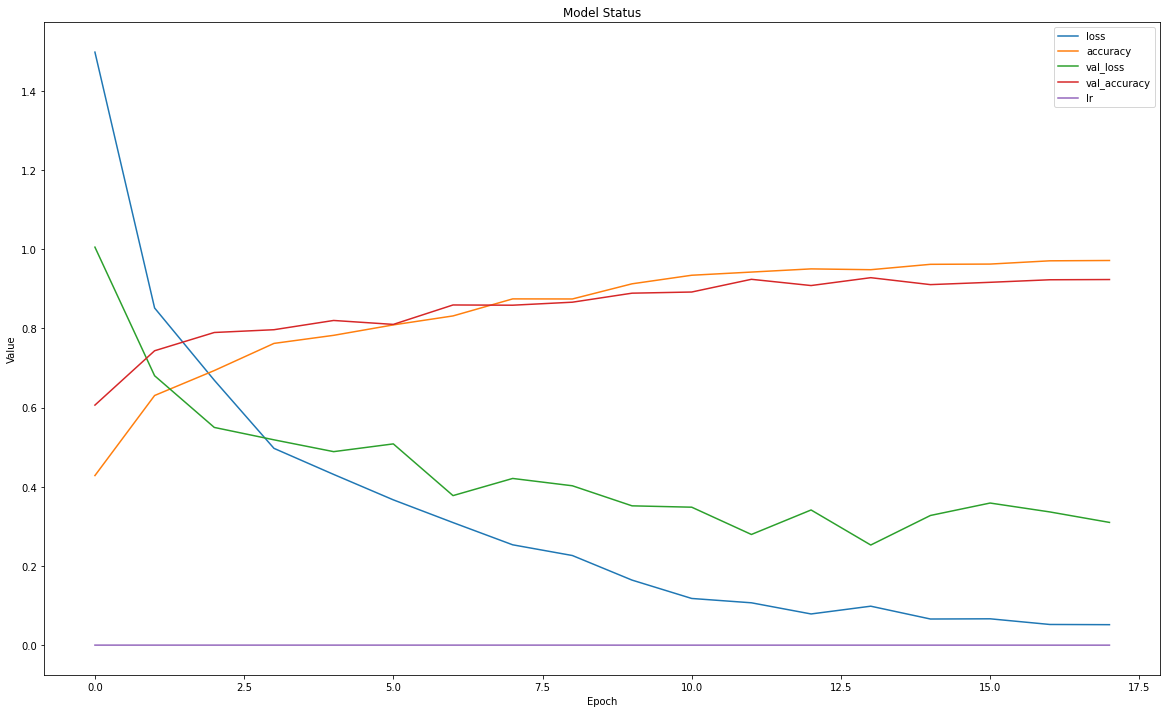

In [85]:
pd.DataFrame(historyXception.history).plot(figsize=(20, 12))
plt.title('Model Status')
plt.ylabel('Value')
plt.xlabel('Epoch');

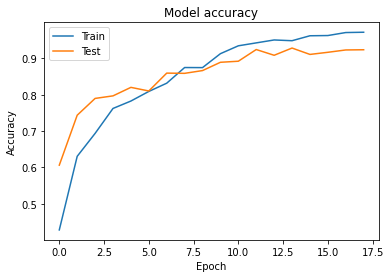

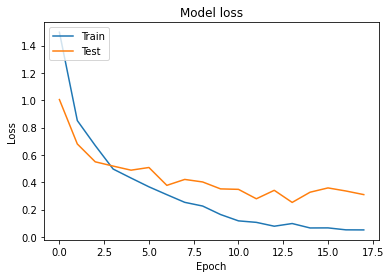

In [86]:
plt.plot(historyXception.history['accuracy'])
plt.plot(historyXception.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(historyXception.history['loss'])
plt.plot(historyXception.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<a id='perf'></a>
## Model Performance

In [88]:
test_accu = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

725/725 [==============================] - 10s 14ms/step - loss: 0.2821 - accuracy: 0.9310
The testing accuracy is : 93.1034505367279 %


In [89]:
from keras.models import load_model
model = load_model('./model_XceptionS.h5')

In [90]:
idx2label_dict = {testRgb99.class_indices[k]: k for k in testRgb99.class_indices}
idx2label_dict

{0: 'Actinic_keratoses',
 1: 'Basal_Cell_Carcinoma',
 2: 'Benign_Keratosis_Like',
 3: 'Dermatofibroma',
 4: 'Melanocytic_Nevi',
 5: 'Melanoma',
 6: 'Vascular_Lesions'}

725/725 [==============================] - 10s 13ms/step - loss: 0.2821 - accuracy: 0.9310
The testing accuracy is : 93.1034505367279 %
confusion matrix :
 [[ 49   0   2   0   1   0   0]
 [  0  72   5   0   0   0   0]
 [  2   0 166   0   0   3   0]
 [  0   0   1  17   0   0   0]
 [  0   0  13   0 181  15   2]
 [  0   0   2   0   3 168   1]
 [  0   0   0   0   0   0  22]]
Precision Score :  0.9310344827586207
Recall Score :  0.9310344827586207
classification_report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       1.00      0.94      0.97        77
           2       0.88      0.97      0.92       171
           3       1.00      0.94      0.97        18
           4       0.98      0.86      0.91       211
           5       0.90      0.97      0.93       174
           6       0.88      1.00      0.94        22

    accuracy                           0.93       725
   macro avg       0.94      0.95      0

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


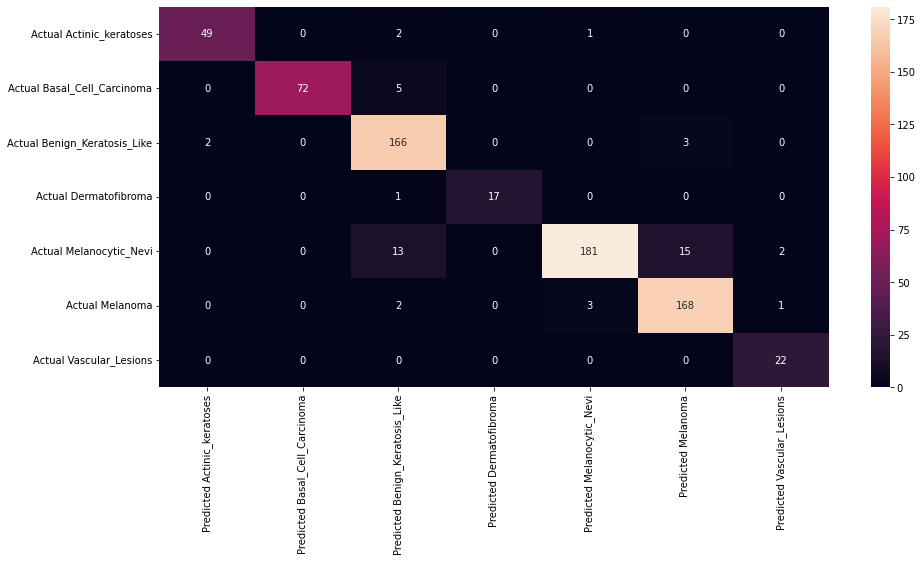

In [93]:
predict_x=model_Xception.predict(testRgb) 
y_pred=np.argmax(predict_x,axis=1)
idx2label_dict = {testRgb99.class_indices[k]: k for k in testRgb99.class_indices}
y_true = testRgb99.classes


plt.figure(figsize = (15,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1,2,3,4,5,6]),
                  
                  index=["Actual " + idx2label_dict[0],
                         "Actual " + idx2label_dict[1],
                         "Actual " + idx2label_dict[2],
                         "Actual " + idx2label_dict[3],
                         "Actual " + idx2label_dict[4],
                         "Actual " + idx2label_dict[5],
                         "Actual " + idx2label_dict[6]],
                  
                  columns=["Predicted "+ idx2label_dict[0],
                           "Predicted "+ idx2label_dict[1],
                           "Predicted "+ idx2label_dict[2],
                           "Predicted "+ idx2label_dict[3],
                           "Predicted " + idx2label_dict[4],
                           "Predicted " + idx2label_dict[5],
                           "Predicted " + idx2label_dict[6]])

seaborn.heatmap(cm,annot=True,fmt="d");

test_accuracy = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

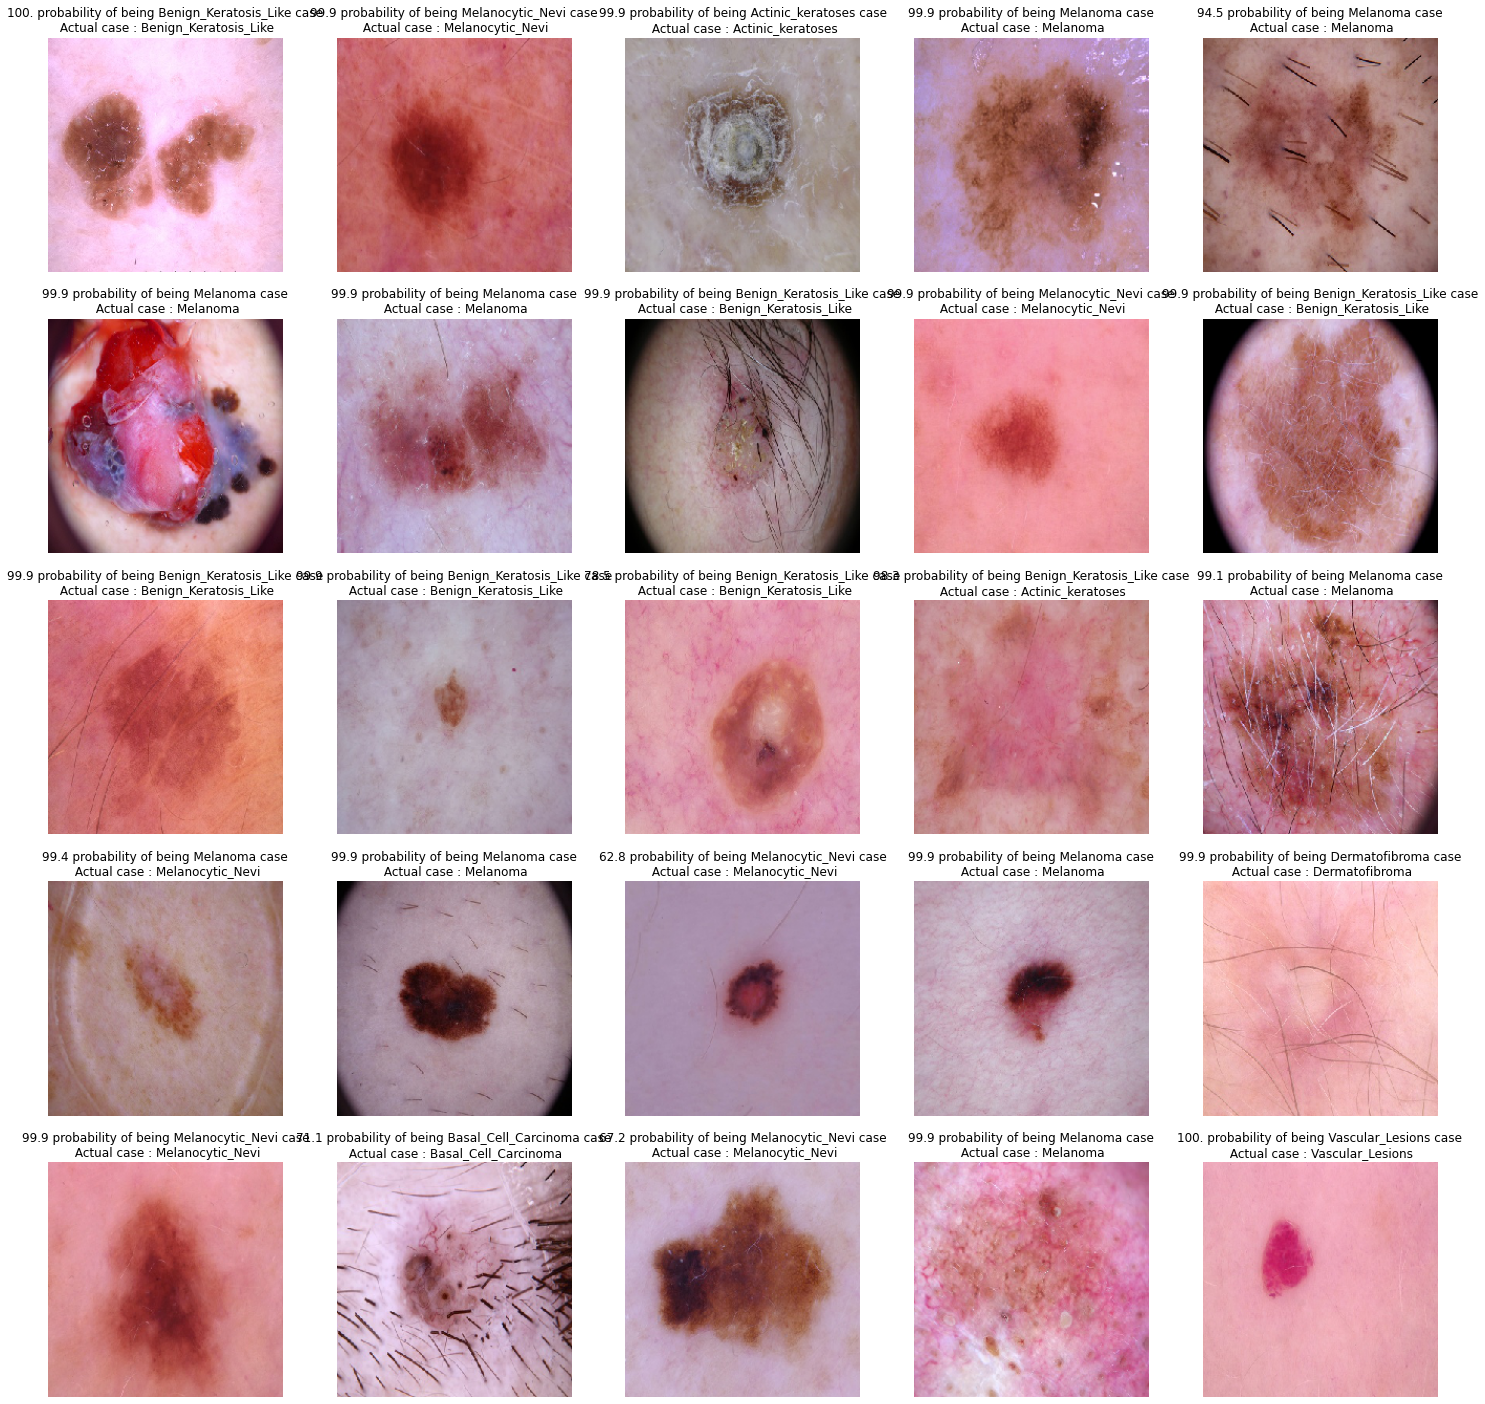

In [96]:
plt.figure(figsize=(25,25))
randomlist = random.sample(range(0, len(testRgb)-1), 25)
index_list = 0
for i in range(0+228, 25+228):
        plt.subplot(5, 5, (i-228)+1)
        #print(predict_x[randomlist[index_list]])
        index = np.argmax(predict_x[randomlist[index_list]],axis=0)
        out = str(predict_x[randomlist[index_list]][index]*100)[:4] + ' probability of being '+idx2label_dict[y_pred[randomlist[index_list]]]+' case'
        #print(y_pred[randomlist[index_list]] ,index , predict_x[randomlist[index_list]][index])
        plt.title(out+"\n Actual case : "+ idx2label_dict.get(y_true[randomlist[index_list]]))    
        plt.imshow(np.squeeze(testRgb[randomlist[index_list]][0]))
        plt.axis('off')
        index_list = index_list + 1
plt.show()

In [95]:
img = cv2.imread(test_Dermatofibroma['filename'][0])
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_arr = tf.keras.preprocessing.image.img_to_array(gray)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = model_MobileNet.predict(input_arr)
print(np.argmax(predictions,axis=1)   ,predictions)
print(np.argmax(predictions,axis=1)   ,predictions[0]*100)
print(np.argmax(predictions,axis=1)   ,predictions[0][1]*100)

[3] [[1.0401255e-09 2.0508819e-09 5.0193046e-07 9.9999940e-01 5.2672362e-08
  8.3780100e-10 9.0780965e-09]]
[3] [1.0401256e-07 2.0508818e-07 5.0193044e-05 9.9999939e+01 5.2672362e-06
 8.3780101e-08 9.0780964e-07]
[3] 2.0508819087439178e-07


<a id='tensor'></a>
## Convert Model Keras To TensorFlow

In [97]:
from tensorflow import keras
from tensorflow import lite
saved_model_dir = './model_XceptionS.h5'
model = keras.models.load_model(saved_model_dir)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("./model_XceptionS.tflite","wb").write(tflite_model)

2022-06-06 07:56:13.968595: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
2022-06-06 07:56:32.160790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 07:56:32.161236: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-06 07:56:32.162347: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-06 07:56:32.163886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.

88032856

In [98]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="./model_XceptionS.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 224 224   3] <class 'numpy.float32'>

1 output(s):
[1 7] <class 'numpy.float32'>
